In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from collections import Counter
import os

In [188]:
#Data reading & merging
data_files = os.listdir('Sales_Data')
dframes_list = []
for file in data_files:
    dframes_list.append(pd.read_csv(os.path.join('Sales_Data', file)))
sales_data = pd.concat(dframes_list)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [189]:
#Drop null values
sales_data = sales_data.dropna()
sales_data = sales_data[sales_data['Order ID'] != 'Order ID']
sales_data.shape

(185950, 6)

In [190]:
#Make sure that each feature has the correct datatype
sales_data = sales_data.astype({'Order ID': 'int32',
                              'Product': 'object',
                              'Quantity Ordered': 'int32',
                              'Price Each': 'float32',
                              'Order Date': 'datetime64',
                              'Purchase Address': 'object'})
sales_data.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [195]:
#Add Month, and Total Price Column
sales_data['Month']  = sales_data['Order Date'].dt.month
sales_data['Total Price']  = sales_data['Quantity Ordered'] * sales_data['Price Each'] 
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


Text(0, 0.5, 'Sales (Million $)')

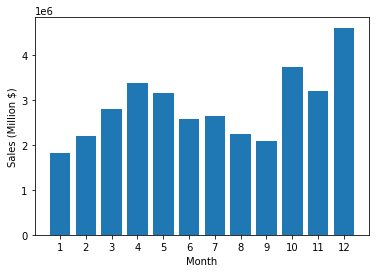

In [127]:
#Question 1: What was the best month for sales? How much was earned that month?
#Answer 1: the 12th month, almost 5 milion $

months = range(1, 13)
month_sales = sales_data.groupby(['Month']).sum('Total Price')
plt.bar(months, month_sales['Total Price'])

plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales (Million $)')

In [194]:
#Add City Column
adress = sales_data['Purchase Address'].str.split(',', expand=True)
city = adress[1]
state = adress[2].apply(lambda x: x.split(' ')[1])
sales_data['City'] = city + ' ' + state
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston MA
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles CA
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles CA


Text(0, 0.5, 'Sales (Million $)')

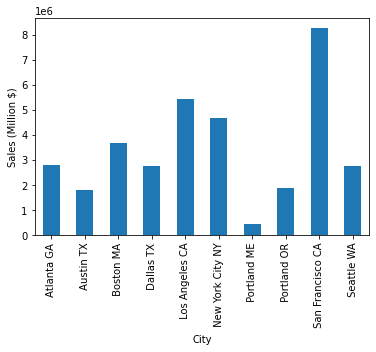

In [193]:
#Question2: What city sold the most product?
#Answer2 : San Francisico CA

sales_data.groupby('City').sum()['Total Price'].plot.bar()
plt.xlabel('City')
plt.ylabel('Sales (Million $)')

In [131]:
#Add Day and Hour Columns
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data['Minute'] = sales_data['Order Date'].dt.minute
sales_data.shape

(185950, 11)

Text(0, 0.5, 'Sales (Million $)')

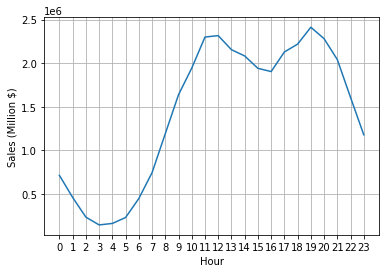

In [132]:
# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
# Answer 3: Around 1 AM would be great time each day, also at the beginning of May.

sales_per_day = sales_data.groupby('Hour').sum()['Total Price']
sales_per_day.plot()

plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.grid()
plt.ylabel('Sales (Million $)')

Text(0, 0.5, 'Sales ($)')

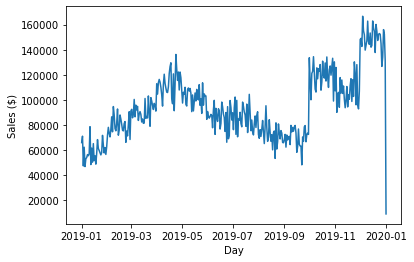

In [133]:
sales_data['Day'] = sales_data['Order Date'].dt.date
sales_per_day = sales_data.groupby('Day').sum()['Total Price']
sales_per_day.plot()
plt.ylabel('Sales ($)')

In [281]:
#Get the products ordered togather
products = [product for product, _ in grouped_by_product]
prods_order_togther = sales_data[sales_data.duplicated(['Order ID'], keep=False)]
prods_order_togther['Grouped Products'] = prods_order_togther.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
prods_order_togther = prods_order_togther[['Order ID', 'Grouped Products']].drop_duplicates()
prods_order_togther.head()

<ipython-input-281-527e298be2d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prods_order_togther['Grouped Products'] = prods_order_togther.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [275]:
#Group up and sum any 2 products ordered togather
count = Counter()
for row in temp_df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [276]:
#Look up table product to index
productToIdx = {}
for i, product in enumerate(products):
    productToIdx[product] = i

In [279]:
#Prepare heat map matrix
product_types = len(products)
product_mat = np.zeros([product_types, product_types], 'int32')
for prod1,prod2 in count:
    order_num = count[(prod1, prod2)]
    product_mat[productToIdx[prod1]][productToIdx[prod2]] = order_num

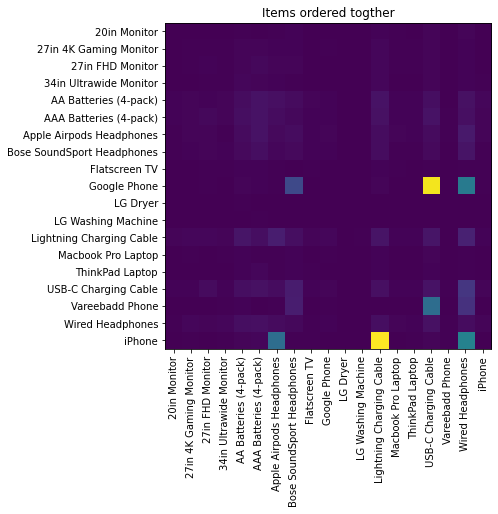

In [300]:
#Question 4: What products are most often sold together?
#Answer 4: 1-Lightning Charging Cable,iPhone 2- Google Phone,USB-C Charging Cable ..

fig, ax = plt.subplots()
im = ax.imshow(product_mat)

# We want to show all ticks...
ax.set_xticks(np.arange(product_types))
ax.set_yticks(np.arange(product_types))

# ... and label them with the respective list entries
ax.set_xticklabels(products, rotation='vertical')
ax.set_yticklabels(products)

fig.set_size_inches(6,6)
ax.set_title("Items ordered togther")
plt.show()

<ipython-input-273-a41bc6d7b07b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


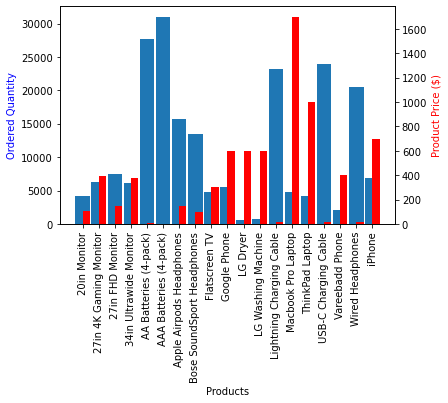

In [273]:
#Question 5: What product sold the most? Why do you think it sold the most?
#Answer 5: Batteries, Charging Cable .. Maybe cause they are not costy

grouped_by_product = sales_data.groupby(['Product'])
sold_quantity_per_product = grouped_by_product['Quantity Ordered'].sum()
product_price = grouped_by_product.mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, sold_quantity_per_product, width=.9)
ax2.bar(products, product_price, width=.45, align='edge', color='red')

ax1.set_xlabel('Products')
ax1.set_ylabel('Ordered Quantity', color='b')
ax2.set_ylabel('Product Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()